# A Review of Common Dimensionality Reduction Techniques

# Part One: Sales Data

## Download the data
### https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

## Missing value ratio 
### is used to simply drop certain columns (variables) that do not meet a pre-determined value of missingness (i.e. at least 50% of observations)

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# read the data
train = pd.read_csv("train_data.csv")

In [8]:
# check the percentage of missing values for each variable
train.isnull().sum()/len(train)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [9]:
# set a missingness threshold of 20% and save variables that do not meet this threashold
a = train.isnull().sum()/len(train)*100
variables = train.columns
variable = []
for i in range(0,12):
    if a[i]<=20: # setting threshold to 20%
        variable.append(variables[i])

## Low Variance Filter

In [11]:
# this method simply drops the variables with very low variance
# first impute missing values
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [12]:
# check for missingness
train.isnull().sum()/len(train)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [13]:
# calculate the variance
train.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

In [14]:
# Item_Visibility has a very low variance so we can drop it
numeric = train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i]>=10:   #setting the threshold as 10%
       variable.append(numeric[i+1])

IndexError: index 4 is out of bounds for axis 0 with size 4

## High Correlation Filter

In [16]:
# high correlation greatly hinders performance of linear and logistic regression models

In [17]:
df = train.drop('Item_Outlet_Sales', 1)
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.014168,0.024951,0.007739
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834
Item_MRP,0.024951,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000


In [18]:
# There are no correlated variables in this dataset
# (correlation > 0.5-0.6 is considered high)

## Random Forest

In [22]:
# we must first convert categorial data to numeric using one hot encoding
# because Random Forest only takes numeric inputs.
# We are also dropping ID variables.

In [24]:
from sklearn.ensemble import RandomForestRegressor
df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,train.Item_Outlet_Sales)

KeyError: "['Item_Identifier' 'Outlet_Identifier'] not found in axis"

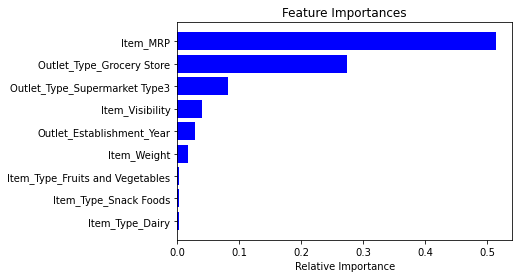

In [30]:
# plot the feature importance graph
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [26]:
# Use the SelectFromModel function of sklearn to pick features
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(df, train.Item_Outlet_Sales)

# Part Two: Image Classification

## Download the data

### https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-apparels/

## Factor Analysis

### is a method that groups highly correlated variables into "factors"

In [98]:
import glob
import cv2 

In [102]:
images = [cv2.imread(file) for file in glob.glob("/Users/Brandon_Warner/Desktop/machine_learning_math_bundle/vision_train_data/train/*.png")]

### You may need to install cv2 (to do this, open terminal, and type 'pip install opencv-python')

### Also, replace the glob path with your path. You can print the working directory by typing 'pwd'

In [104]:
# covert images into numpy array format
images = np.array(images)
images.shape

(60000, 28, 28, 3)

In [105]:
# this is a three-dimensional array. We need a one-dimensional array
image = []
for i in range(0,60000):
    img = images[i].flatten()
    image.append(img)
image = np.array(image)

In [112]:
# we will now create a dataframe containing the pixel values of every individual pixel for each image using labels from the train.csv file (you must replace path)
train = pd.read_csv('vision_train_data/train.csv')

In [114]:
feat_cols = [ 'pixel'+str(i) for i in range(image.shape[1]) ]
df = pd.DataFrame(image,columns=feat_cols)
df['label'] = train['label']

In [117]:
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 3).fit_transform(df[feat_cols].values)
# n_components sets the number of factors in the transformed data

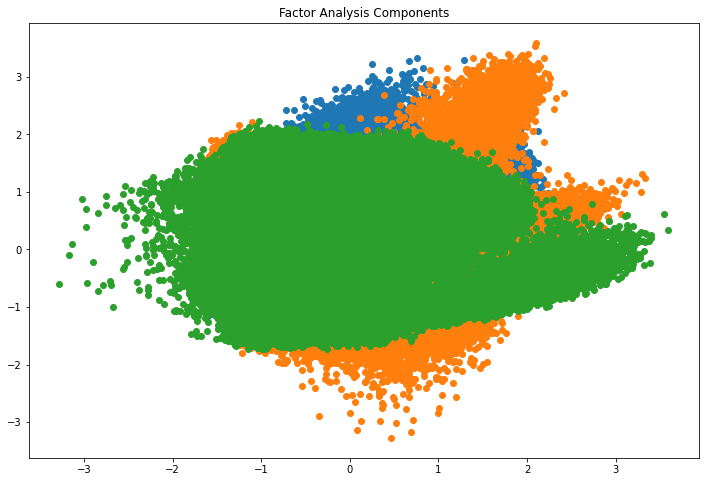

In [118]:
# now we visualize
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])

## Principal Component Analysis (PCA)

### PCA helps us extract a new set of variables, called principal components, from existing variables

## Main ideas: 

 - A principal component is a linear combination of the original variables

 - The first principal component explains maximum variance in the dataset 

 - Second principal component (PC) explains the remaining variance and is uncorrelated to the first PC

<Figure size 432x288 with 0 Axes>

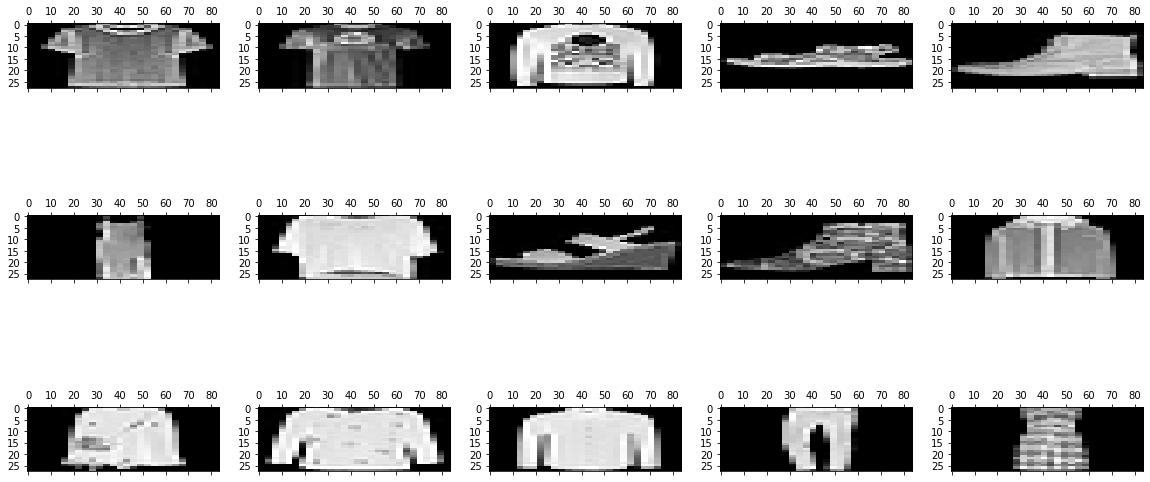

In [121]:
# let's plot some of the images from the dataset:
rndperm = np.random.permutation(df.shape[0])
plt.gray()
fig = plt.figure(figsize=(20,10))
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28*3)).astype(float))

In [123]:
# let's transform the dataset using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df[feat_cols].values)
# like before, n_components refers to the number of principal components

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

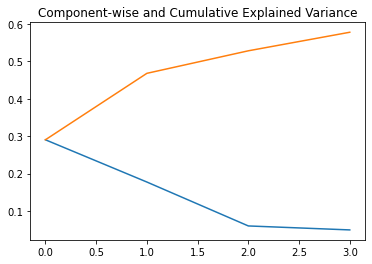

In [125]:
# let's visualize how much variance has been explained using these 4 components
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
# the blue line represents component-wise explained variance
# the orange line represents cumulative explained variance

### We are able to explain around 60% variance in the dataset using just 4 components

Text(0.5, 0.98, '4-Component PCA')

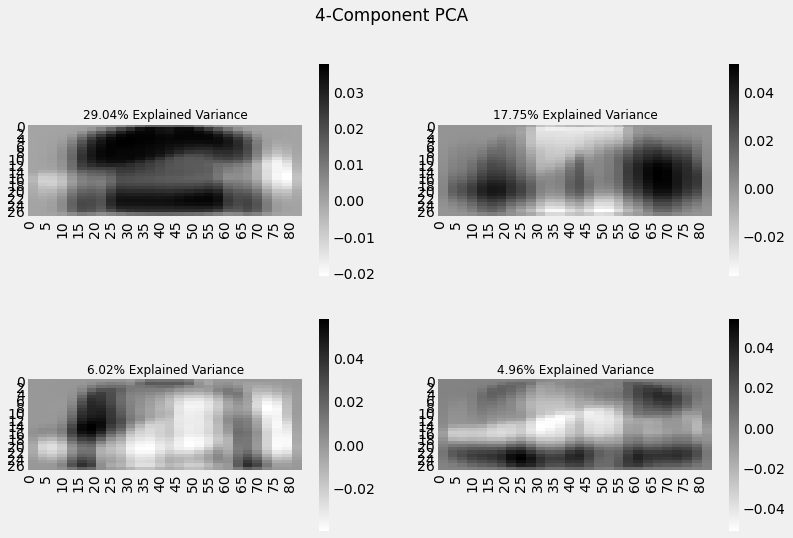

In [126]:
# let's visualize each decomposed component
import seaborn as sns
plt.style.use('fivethirtyeight')
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.heatmap(pca.components_[0, :].reshape(28, 84), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 84), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca.components_[2, :].reshape(28, 84), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca.components_[3, :].reshape(28, 84), ax=axarr[1][1], cmap='gray_r')
axarr[0][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
fontsize=12
)
axarr[0][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
fontsize=12
)
axarr[1][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
fontsize=12
)
axarr[1][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100),
fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component PCA')

### the darkness represents the amount of captured variance

## Singular Value Decomposition (SVD)

### SVD decomposes the original variables into three constituent matrices, removing redundant features from the dataset. It does this by using Eigenvalues and Eigenvectors to determine those three matrices.

In [127]:
# let's implement SVD on our original variables
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(df[feat_cols].values)

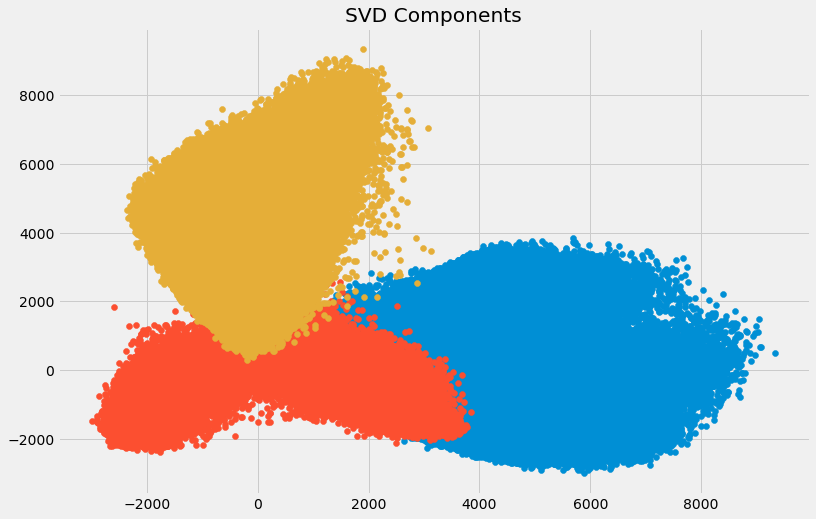

In [128]:
# let's visualize the transformed variables
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])

## Independent Component Analysis (ICA)

### Using information-theory concepts, ICA looks for independent factors (not uncorrelated ones like in PCA). It's assumptions are:

 - the given variables are linear mixtures of some unkown latent variables

 - the latent variables are mutually independent (i.e. not dependent on other variables)

In [129]:
# ICA implementation
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X=ICA.fit_transform(df[feat_cols].values)

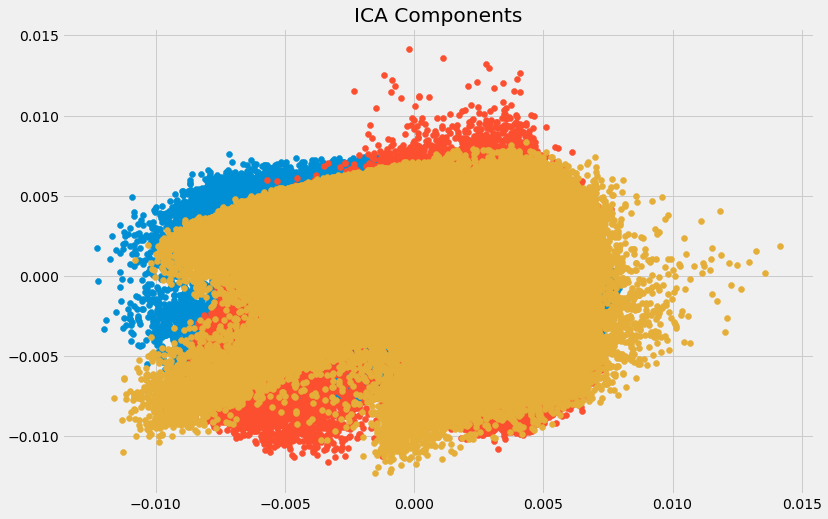

In [130]:
# plot the components
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,1], X[:,2])
plt.scatter(X[:,2], X[:,0])

## Dimensionality Reduction Methods Based on Projection

### Isometric Mapping (ISOMAP)

In [132]:
from sklearn import manifold 
trans_data = manifold.Isomap(n_neighbors=5, n_components=3, n_jobs=-1).fit_transform(df[feat_cols][:6000].values)
# n_neighbors: number of neighbors for each point
# n_components: number of coordinates for manifold
# n_jobs: -1 will use all the CPU cores available

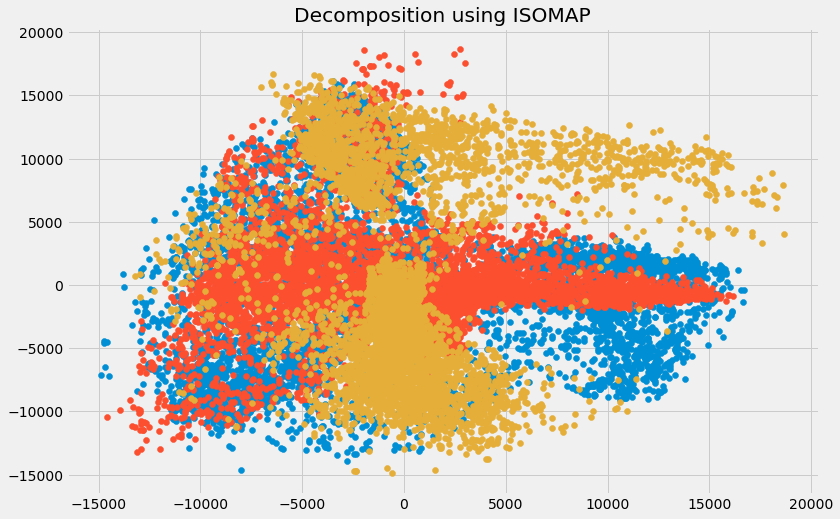

In [133]:
# visualize the transformed data
plt.figure(figsize=(12,8))
plt.title('Decomposition using ISOMAP')
plt.scatter(trans_data[:,0], trans_data[:,1])
plt.scatter(trans_data[:,1], trans_data[:,2])
plt.scatter(trans_data[:,2], trans_data[:,0])

### these components are even less correlated than the SVD components used earlier

## t- Distributed Stochastic Neighbor Embedding (t-SNE)

### t-SNE searches for patterns in a non-linear way (either local or global approaches)

 - Local: maps nearby points on the manifold to nearby points in the low dimensional representation

 - Global: maps nearby points on manifold to nearby points in low dimensional representation as well as far away points to far away points (preserving geometry at all scales)

In [135]:
# t-SNE implmentation
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=3, n_iter=300).fit_transform(df[feat_cols][:6000].values)

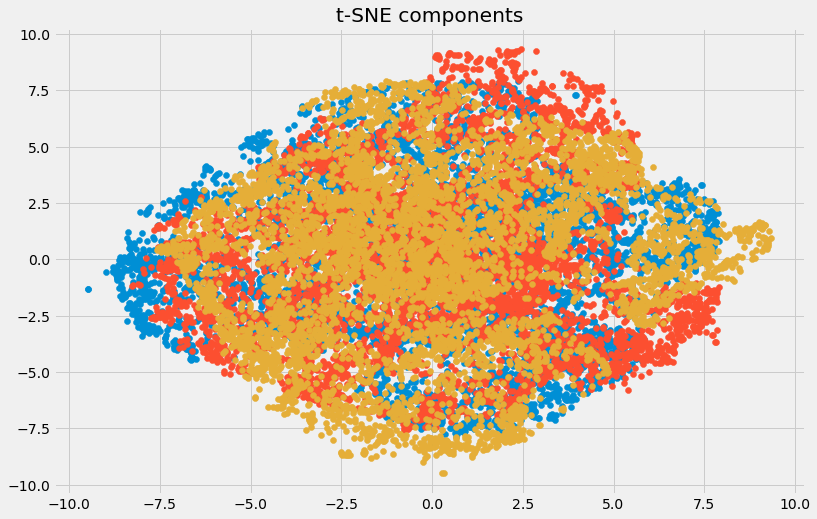

In [136]:
# visualizing the transformed data
plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(tsne[:,0], tsne[:,1])
plt.scatter(tsne[:,1], tsne[:,2])
plt.scatter(tsne[:,2], tsne[:,0])

## Drawbacks of t-SNE

 - loss of large-scale information

 - slow computation time

 - inability to meaninfully represent very large dataset

## Uniform Manifold Approximation and Projection (UMAP)

 - can preserve as much of the local, and more of the global data structure as compared to t-SNE, with a shorter runtime

In [144]:
# implementation
#import umap # you may need to 'pip install umap-learn' library
import umap.umap_ as umap
umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3).fit_transform(df[feat_cols][:6000].values)


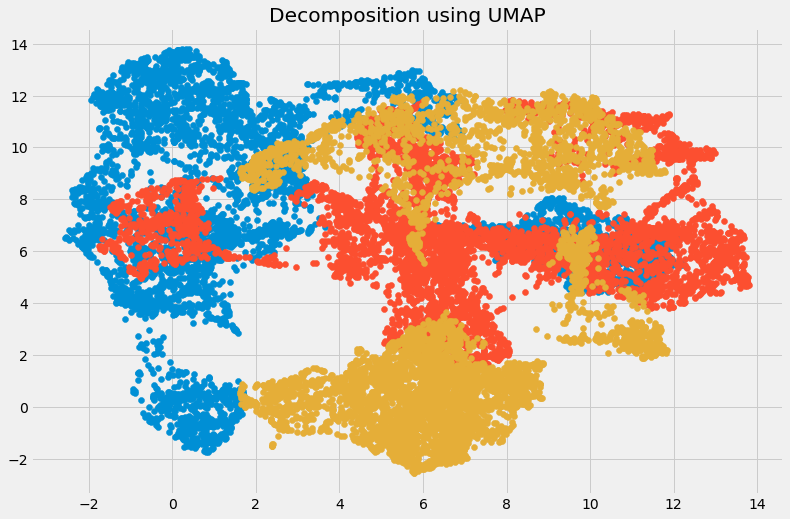

In [145]:
# plot the transformation
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP')
plt.scatter(umap_data[:,0], umap_data[:,1])
plt.scatter(umap_data[:,1], umap_data[:,2])
plt.scatter(umap_data[:,2], umap_data[:,0])

### If you compare this to the t-SNE visualization, you will notice there is much less overlap here, which means there is much less correlation among the components. This is one of the main reasons why UMAP gives better (and quicker) results than t-SNE